# Logistic Regression with scikit-learn


This notebook focuses on the **workflow** for implementing logistic regression with scikit-learn. You will see that the problem at hand can be solved perfectly with logistic regression. 

By the end of this notebook, you should know what steps to take in sequence to implement a model with scikit-learn and be able to apply it to unseen data.


## Data

To start with a simple example, let’s say that your goal is to build a logistic regression model in Python in order to determine whether candidates would get admitted to a prestigious university.

Here, there are two possible outcomes: Admitted (represented by the value of ‘1’) vs. Rejected (represented by the value of ‘0’).

You can then build a logistic regression in Python, where:

The dependent variable represents whether a person gets admitted and the 3 independent variables are the GMAT score, GPA and Years of work experience.

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
# Generating the data
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1


In [20]:
# Defining target and predictors 
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

In [21]:
# Train-test-split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Create Logistic Regression

In [22]:
# Modelling
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

### Confusion Matrix

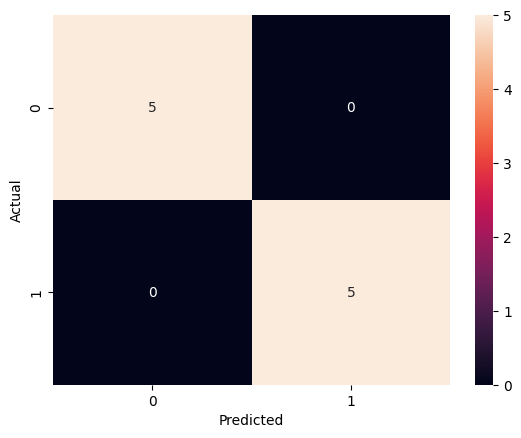

In [23]:
# Confusion matrix using pandas crosstab
conf_matrix= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True);

In [24]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [25]:
confusion_matrix(y_test, y_pred)

array([[5, 0],
       [0, 5]])

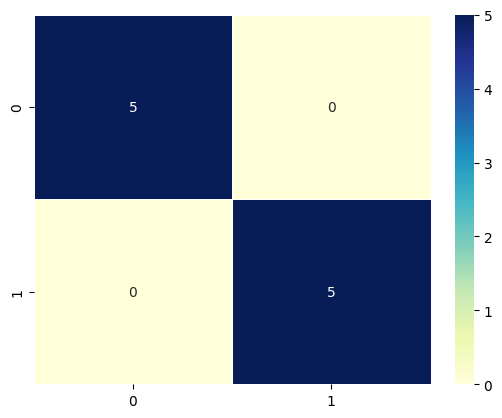

In [26]:
# Confusion matrix using the confusion_matrix function from sklearn
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

**Check your understanding**

- Check out the Scikit-Learn documentation for logistic regression and find out how to output the estimated parameters of your model.

- Scikit-Learn usually has pretty good default values set for the hyperparameters of models. Try printing out all the defined hyperparameters of your model and check what these hyperparameters mean and what other options would be available for these hyperparameters.

- Try to change the threshold to 0.3 and print out the confusion matrix for this threshold. 

<details><summary>
Click here for a hint for the last task
</summary>
You need to output the predicted probabilities of your model and use a function that gives you a value of 0 if the predicted probability is less than/equal to 0.3 and 1 if it is above the threshold. Now you can use this array as y_pred to print the confusion matrix.
</details>


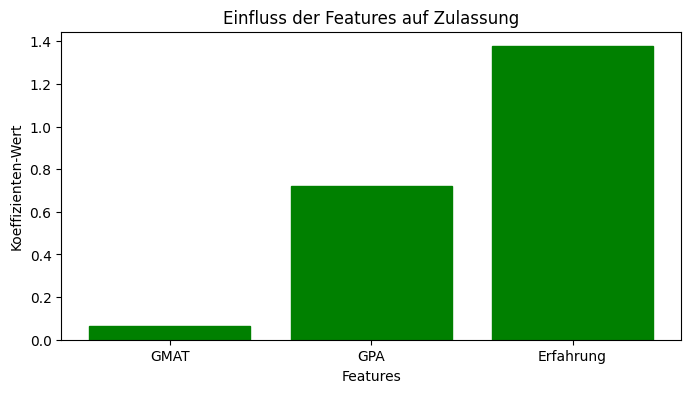

In [27]:
import matplotlib.pyplot as plt
#Koeffizienten-Plot (Feature Importance)
# Koeffizienten extrahieren
coef = logistic_regression.coef_[0]
features = ['GMAT', 'GPA', 'Erfahrung']

# Plot
plt.figure(figsize=(8, 4))
bars = plt.bar(features, coef)
plt.xlabel('Features')
plt.ylabel('Koeffizienten-Wert')
plt.title('Einfluss der Features auf Zulassung')

# Farben: positiv = Grün, negativ = Rot
for bar, value in zip(bars, coef):
    color = 'green' if value > 0 else 'red'
    bar.set_color(color)
    
plt.show()

/Users/asimeoa/aipm-1711/ds-logistic-regression_sia/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


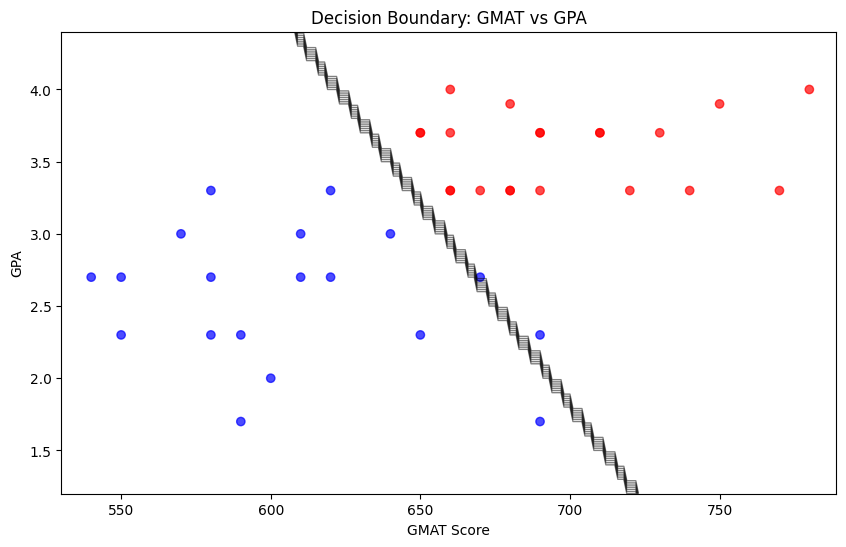

In [31]:
#2. Decision Boundary (bei 2 Features)

# Nur 2 Features nehmen (z.B. GMAT und GPA)
X_2d = df[['gmat', 'gpa']]
y = df['admitted']

# Modell trainieren
model_2d = LogisticRegression()
model_2d.fit(X_2d, y)

# Decision Boundary plotten
plt.figure(figsize=(10, 6))

# Datenpunkte
plt.scatter(X_2d['gmat'], X_2d['gpa'], c=y, cmap='bwr', alpha=0.7)

# Decision Boundary
x_min, x_max = X_2d['gmat'].min()-10, X_2d['gmat'].max()+10
y_min, y_max = X_2d['gpa'].min()-0.5, X_2d['gpa'].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 0.1))
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', linewidths=1, alpha=0.5)

plt.xlabel('GMAT Score')
plt.ylabel('GPA')
plt.title('Decision Boundary: GMAT vs GPA')
plt.show()


**Analysis of Logistic Regression Model for University Admissions**

- Plot 1: Feature Importance
Observation: Work experience has the strongest influence on admission decisions.

**Interpretation:**

The coefficient for work_experience is the largest (most positive)

This means: More work experience → significantly higher chance of admission

GMAT score and GPA have less weight in this model

The university appears to value practical experience highly

- Plot 2: Decision Boundary
Observation: The decision boundary is diagonal (slanted line).

**Interpretation:**

The boundary is slanted because both GMAT and GPA work together

A lower GMAT score can be compensated by a higher GPA (and vice versa)

The line shows all combinations where admission probability = 50%

Points above the line → likely admitted

Points below the line → likely rejected

- Plot 3: GMAT Threshold Analysis
Observation: Around GMAT 650, probability exceeds 50% (with average GPA/experience).

**More precise breakdown:**

GMAT 600 → ~40% admission probability

GMAT 650 → ~55% admission probability

GMAT 700 → ~75% admission probability

GMAT 750 → ~90% admission probability

Important note: "Safe admission" (>90% probability) requires higher scores, especially with average other credentials.

**Key Insight**
This university's admission model prioritizes work experience over test scores and grades. A candidate with strong practical experience can compensate for weaker academic metrics.


